# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Introduction: Best Area to open a business in Ottawa region

In this project, I will be analyzing the Ottawa region for the best area in which a business can succeed.

Since the Ottawa region is big and there are a lot of different neighborhoods, it's difficult to predict which area is the best to open up a venue.

I will use data science to analyze the region by neighborhood and its population, and I will add the number of tips that people leave in that area to see which area is the most active.

## Data

Based on the definition of our problem, the factors that will influence our decision are:
* number of existing restaurants in the neighborhood (any type of restaurant)
* the population of each neighborhood 
* number of tips people leave

We decided to use the regularly-spaced grid of locations to define our neighborhoods.

The following data sources will be needed to extract/generate the required information:
* neighborhood areas will be generated from CSV file and approximate addresses of centers of those areas will be obtained using **Google Maps API reverse geocoding**
* number of restaurants and their type and location in every neighborhood and tips will be obtained using **Foursquare API**
* coordinates of Ottawa will be obtained using **Google Maps API geocoding** of well known Ottawa location 

In [857]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


#%pip install geopy 
import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy import geocoders
from pandas.io.json import json_normalize
#%pip install folium 
import folium # map rendering library
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


In [692]:
df=pd.read_csv('Ottawa_Neighbourhood_Study_ONS__Neighbourhood_Boundaries_Gen_2.csv')
df.head()

,FID,flag,ONS_ID,Name,POPEST,Name_FR,Shape__Area,Shape__Length
0,1,0,938,Old Barrhaven West,16880,Old Barrhaven Ouest,1.030476e+07,15745.394276
1,2,1,3,Beacon Hill South - Cardinal Heights,7195,Beacon Hill Sud - Cardinal Heights,4.533907e+06,10362.452308
2,3,0,902,Beaverbrook,6715,,5.744251e+06,10135.952452
3,4,1,6,Bells Corners East,4729,Bells Corners Est,6.786858e+06,11170.923795
4,5,1,7,Bells Corners West,4158,Bells Corners Ouest,2.772272e+06,7467.061209


In [693]:
df.drop(columns=['ONS_ID','flag','FID','Name_FR'],inplace=True)

In [694]:
df.head()

,Name,POPEST,Shape__Area,Shape__Length
0,Old Barrhaven West,16880,1.030476e+07,15745.394276
1,Beacon Hill South - Cardinal Heights,7195,4.533907e+06,10362.452308
2,Beaverbrook,6715,5.744251e+06,10135.952452
3,Bells Corners East,4729,6.786858e+06,11170.923795
4,Bells Corners West,4158,2.772272e+06,7467.061209


In [12]:
address='Old Barrhaven West'
response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={}',address)

resp_json_payload = response.json()

print(resp_json_payload )

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


In [68]:
geolocator = Nominatim(user_agent="google")
location = geolocator.geocode("Bells Corners East")
print(location.latitude,location.longitude)

45.3189964 -75.8296909


In [108]:
geolati={}
geolong={}
geolocator = Nominatim(user_agent="google")
count=0
for loc in df['Name']:
    count=count+1
    location=geolocator.geocode(loc,timeout = None)
    if location==None:
        continue
    #print(location.latitude)
    #print(location.longitude)
    geolati.update({loc:location.latitude})
    geolong.update({loc:location.longitude})



C:\Users\16138\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `timeout=None` has been passed to a geocoder call. Using default geocoder timeout. In geopy 2.0 the behavior will be different: None will mean "no timeout" instead of "default geocoder timeout". Pass geopy.geocoders.base.DEFAULT_SENTINEL instead of None to get rid of this warning.
  import sys


GeocoderTimedOut: Service timed out

In [61]:
print(geolati,geolong)

{'Old Barrhaven West': 45.2790204, 'Beaverbrook': 35.2784706, 'Bells Corners East': 45.3189964, 'Bells Corners West': 45.3189964, 'Billings Bridge - Alta Vista': 45.3875209, 'Carleton Heights - Rideauview': 45.3855938, 'Carlington': 45.37971555, 'Laurentian': 44.2358326, 'Carson Grove - Carson Meadows': 36.36863, 'Centrepointe': 45.68571945, 'Centretown': 45.4163403, 'Chapel Hill North': 45.4548918, 'Skyline - Fisher Heights': 45.3649685, 'Civic Hospital-Central Park': 45.3960008, 'Cityview - Crestview - Meadowlands': 45.3511542, 'Glebe - Dows Lake': 45.39461515, 'Greenboro East': 45.359732, 'Hintonburg - Mechanicsville': 45.40704595, 'Katimavik - Hazeldean': 45.3020741, 'Lindenlea - New Edinburgh': 45.439003, 'Lowertown': 45.4324898, 'Orléans Village - Chateauneuf': 45.4605164, 'Overbrook - McArthur': 45.4319656, 'Qualicum - Redwood Park': 45.3405235, 'Queenswood Heights': 45.470721, 'Riverside Park': 39.2703627, 'Sandy Hill': 45.4263467, 'Trend-Arlington': 45.332975000000005, 'South 

In [115]:
len(geolong) # latitude
print(count,len(geolong))

60 51


In [62]:
for key,value in geolong.items():
    count=0
    for i in df['Name']:
        if i==key:
            df.at[count,'longitude']=value
        count=count+1

In [63]:

for key,value in geolati.items():
    count=0
    for i in df['Name']:
        if i==key:
            df.at[count,'latitude']=value
        count=count+1



In [72]:
df.head()

,Name,POPEST,Shape__Area,Shape__Length,longitude,latitude
0,Old Barrhaven West,16880,1.030476e+07,15745.394276,-75.763036,45.279020
1,Beacon Hill South - Cardinal Heights,7195,4.533907e+06,10362.452308,NaN,NaN
2,Beaverbrook,6715,5.744251e+06,10135.952452,-81.193967,35.278471
3,Bells Corners East,4729,6.786858e+06,11170.923795,-75.829691,45.318996
4,Bells Corners West,4158,2.772272e+06,7467.061209,-75.829691,45.318996


In [86]:
df.dropna(subset = ["longitude"], inplace=True)
df.head()

,Name,POPEST,Shape__Area,Shape__Length,longitude,latitude
0,Old Barrhaven West,16880,1.030476e+07,15745.394276,-75.763036,45.279020
2,Beaverbrook,6715,5.744251e+06,10135.952452,-81.193967,35.278471
3,Bells Corners East,4729,6.786858e+06,11170.923795,-75.829691,45.318996
4,Bells Corners West,4158,2.772272e+06,7467.061209,-75.829691,45.318996
5,Billings Bridge - Alta Vista,12653,1.258231e+07,18591.598372,-75.675305,45.387521


In [77]:
username='Z50VZPMVLQMWTZYCTSSMZDBPCJNXRITHUN2VPVOM3CBQKCXQ'
Password='RJJXCKBHUODSGFTR0GJSCPPDU2QUYFUN22S0B5FEUEFZJGRI'
ver='20200420'
print('UserName is:{0}\nPassword is:{1}\nVersion is {2}'.format(username,Password,ver))

UserName is:Z50VZPMVLQMWTZYCTSSMZDBPCJNXRITHUN2VPVOM3CBQKCXQ
Password is:RJJXCKBHUODSGFTR0GJSCPPDU2QUYFUN22S0B5FEUEFZJGRI
Version is 20200420


In [94]:
ottawa_latitude = 45.4215; ottawa_longitude = -75.6972
map_ottawa = folium.Map(location = [ottawa_latitude, ottawa_longitude], zoom_start = 10)

# add markers to map
for lat, lng, neighborhood in zip(df['latitude'], df['longitude'], df['Name']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_ottawa)
    

map_ottawa

In [266]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            username, 
            Password, 
            ver, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearbyvenues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearbyvenues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'Venue ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print('done')
    return(nearbyvenues)

In [420]:
lat=45.280650
lng=-75.762124
radius=500
limit=5
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            username, 
            Password, 
            ver, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
        

In [425]:
print(results)

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b832e3ef964a52015fc30e3', 'name': 'Walter Baker Sports Centre', 'location': {'address': '100 Malvern Dr', 'crossStreet': 'at Sherway Dr', 'lat': 45.280650464714135, 'lng': -75.76212419961222, 'labeledLatLngs': [{'label': 'display', 'lat': 45.280650464714135, 'lng': -75.76212419961222}], 'distance': 0, 'cc': 'CA', 'city': 'Ottawa', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['100 Malvern Dr (at Sherway Dr)', 'Ottawa ON', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d184941735', 'name': 'Stadium', 'pluralName': 'Stadiums', 'shortName': 'Stadium', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/stadium_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b832e3ef964a52015fc30e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is pop

In [249]:
ottawagtavenues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

done


In [350]:
ottawagtavenues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Old Barrhaven West,45.279020,-75.763036,4b832e3ef964a52015fc30e3,Walter Baker Sports Centre,45.280650,-75.762124,Stadium
1,Old Barrhaven West,45.279020,-75.763036,4e6cbc94d4c09a17a5b74b9a,Walter Baker Swimming Pool,45.280489,-75.762156,Pool
2,Old Barrhaven West,45.279020,-75.763036,4b0586e0f964a520b77222e3,Malvern Park,45.281032,-75.759745,Playground
3,Beaverbrook,35.278471,-81.193967,51fab68f498e1537497c43ee,Highland Athletic Center,35.280519,-81.191863,Athletics & Sports
4,Beaverbrook,35.278471,-81.193967,5690ad92498ebce4bf579c00,Universal Travel,35.274718,-81.193613,Rental Car Location


In [473]:
limit=1
venueid='4e6cbc94d4c09a17a5b74b9a'
url="https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}".format(
            venueid,
            username, 
            Password, 
            ver)
results = requests.get(url).json()

In [474]:
results

{'meta': {'code': 200, 'requestId': '5ea0efd260ba08001b31db2c'},
 'response': {'venue': {'id': '4e6cbc94d4c09a17a5b74b9a',
   'name': 'Walter Baker Swimming Pool',
   'contact': {},
   'location': {'address': 'Malvern',
    'crossStreet': 'Greenbank',
    'lat': 45.280489182882604,
    'lng': -75.7621560755491,
    'labeledLatLngs': [{'label': 'display',
      'lat': 45.280489182882604,
      'lng': -75.7621560755491}],
    'cc': 'CA',
    'city': 'Nepean',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['Malvern (Greenbank)', 'Nepean ON', 'Canada']},
   'canonicalUrl': 'https://foursquare.com/v/walter-baker-swimming-pool/4e6cbc94d4c09a17a5b74b9a',
   'categories': [{'id': '4bf58dd8d48988d15e941735',
     'name': 'Pool',
     'pluralName': 'Pools',
     'shortName': 'Pool',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_',
      'suffix': '.png'},
     'primary': True}],
   'verified': False,
   'stats': {'tipCount': 2},
   'lik

In [459]:
count=0

In [415]:
results['response']['tips']['count']

KeyError: 'code'

In [611]:
#tip_list=[]
def gettips(venueid):

    #print(vid)
            
    # create the API request URL    
    # make the GET request
    #print(geturl(vid))
    url=geturl(venueid)
    results = requests.get(url).json()
    #print(results)
    #print(results)
    #print(result)
    # return only relevant information for each nearby venue
    tip_list.append([
        venueid, 
        results['response']['tips']['count']])

    tipvenuecount = pd.DataFrame(tip_list,columns=['venueid','Tip count'] )
            
    print('done')
    return(tipvenuecount)

In [612]:
for i in missingvenue:
    print(ottawagtavenues.loc[i,'Venue ID'])
    tipspervenue1 = gettips(ottawagtavenues.loc[i,'Venue ID'])

4b549bfdf964a52084c227e3
done
4b33a81df964a5204a1c25e3
done
4b61b879f964a520b81e2ae3
done
5246fba111d2851500c12df4
done
4bc744c60050b7135356b83b
done
550051d0498e5b63bb35d95f
done
4b7b4ef1f964a5209d5d2fe3
done
4b0586e3f964a520987322e3
done
4c9f76cf19e4236ab10a5989
done
4b15c2caf964a520e0b323e3
done
4b8eaf94f964a520043133e3
done
4b06f0c2f964a520a7f322e3
done
4ca5ced914c33704e217b93b
done
50574383e4b0d211d1ee97c5
done
4ca5f8627334236ab6f91a58
done
4b12f031f964a520339123e3
done
4bf5710ec6469c74728fec14
done
4b6f0e22f964a520f1d92ce3
done
5005ecd7e4b0645daf340728
done
4d4ae93e5129a35dffb548ac
done
572298b4498e3c813f524b4e
done
4b2ebc8df964a520eae524e3
done
52e2f414498e0872ec17bb2d
done
4d4099e9c1d4721e02f911c7
done
4b0586e1f964a520047322e3
done
5764825e498e720858e533cf
done
4b0a9f40f964a520af2523e3
done
4c268297c11dc9b673232924
done
4b0ff21cf964a520986623e3
done
51b4aa0f498ecfb0717ec021
done
520923db11d2af09028a9430
done
54e7e183498e9af95a66b8ad
done
586ef4f416f00013114368a0
done
5762cfca49

In [664]:
tipspervenue2=pd.DataFrame(columns=['Venue_ID','Tip count'])
tipspervenue2=pd.concat([tipspervenue1, tipspervenue2], ignore_index=True)
print(tipspervenue2)

                       venueid Tip count Venue_ID
0     4b832e3ef964a52015fc30e3         4      NaN
1     4e6cbc94d4c09a17a5b74b9a         2      NaN
2     4b0586e0f964a520b77222e3         1      NaN
3     51fab68f498e1537497c43ee         0      NaN
4     5690ad92498ebce4bf579c00         0      NaN
5     4b549bfdf964a52084c227e3        11      NaN
6     4b33a81df964a5204a1c25e3         2      NaN
7     4b61b879f964a520b81e2ae3        10      NaN
8     5246fba111d2851500c12df4         0      NaN
9     4bc744c60050b7135356b83b         0      NaN
10    550051d0498e5b63bb35d95f         0      NaN
11    4b549bfdf964a52084c227e3        11      NaN
12    4b33a81df964a5204a1c25e3         2      NaN
13    4b61b879f964a520b81e2ae3        10      NaN
14    5246fba111d2851500c12df4         0      NaN
15    4bc744c60050b7135356b83b         0      NaN
16    550051d0498e5b63bb35d95f         0      NaN
17    53ff96ad498ee72e47b75bb5         0      NaN
18    59e24a5769e77b6e001b0729         2      NaN


In [365]:
def geturl(venueid):
    url="https://api.foursquare.com/v2/venues/{}/tips?limit=1&sort=recent&client_id={}&client_secret={}&v={}".format(
            venueid,
            username, 
            Password, 
            ver)
    return(url) 

In [663]:
tipspervenue2.head()

,venueid,Tip count
0,4b832e3ef964a52015fc30e3,4
1,4e6cbc94d4c09a17a5b74b9a,2
2,4b0586e0f964a520b77222e3,1
3,51fab68f498e1537497c43ee,0
4,5690ad92498ebce4bf579c00,0


In [617]:
tipspervenue2.shape

(1320, 2)

In [607]:
missingvenue=[]
for v in ottawagtavenues['Venue ID']:
    count=0
    for i in tipspervenue1['venueid']:
        if v==i:
            count=count+1
            break
    if count==0:
        #print(int(ottawagtavenues[ottawagtavenues['Venue ID']==v].index[0]))
        missingvenue.append(int(ottawagtavenues[ottawagtavenues['Venue ID']==v].index[0]))
    
    
               

5
6
7
8
9
10
5
6
7
8
9
10
48
49
50
51
52
53
54
55
56
57
58
59
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
198
199
200
201
202
203
204
205
206
207
208
209
210
211
252
253
254
255
256
257
258
260
261
262
263
264
266
267
268
269
270
271
273
274
275
276
277
279
280
282
283
284
285
287
288
289
306
198
199
200
201
202
203
204
205
206
207
208
209
210
211
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
306
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
306
258
260
263
266
262
256
252
261
253
255
271
268
277
267
276
274
264
269
257
254
282
275
283
273
270
284
279
285
280
289
287
288
48
49
50
51
52
5

In [608]:
missingvenue = list(dict.fromkeys(missingvenue))
print(missingvenue)

[5, 6, 7, 8, 9, 10, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 252, 253, 254, 255, 256, 257, 258, 260, 261, 262, 263, 264, 266, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277, 279, 280, 282, 283, 284, 285, 287, 288, 289, 306, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 105

In [648]:
for i in range(ottawagtavenues.shape[0]):
    for j in range(tipspervenue2.shape[0]):
        if ottawagtavenues.loc[i,'Venue_ID']==tipspervenue2.loc[j,'venueid']:
            print(tipspervenue2.loc[j,'Tip count'])
            #ottawagtavenues['Tip_Count']=ottawagtavenues.loc[i,tipspervenue2.loc[j,'Tip count']]

4
2
1
0
0
11
11
11
2
2
2
10
10
10
0
0
0
0
0
0
0
0
0
11
11
11
2
2
2
10
10
10
0
0
0
0
0
0
0
0
0
0
2
5
2
0
0
1
2
3
4
0
4
3
2
2
1
2
1
19
7
1
1
2
1
1
0
1
7
1
0
0
0
0
0
1
1
1
1
1
1
10
10
10
10
10
10
11
11
11
2
2
2
2
2
2
2
2
2
9
9
9
0
0
0
3
3
3
0
0
0
1
3
1
0
3
0
1
0
1
1
2
30
8
5
12
8
0
0
6
0
2
0
0
0
3
6
1
3
45
45
45
17
17
17
9
9
9
20
20
20
2
2
2
24
24
24
20
20
20
3
3
3
47
47
47
47
36
36
36
7
7
7
49
49
49
5
5
5
12
12
12
12
5
5
5
18
18
18
3
3
3
26
26
26
4
4
4
38
38
38
1
1
1
19
19
19
19
14
14
14
16
16
16
6
6
6
33
33
33
27
27
27
27
33
33
33
3
3
3
5
5
5
11
11
11
10
10
10
4
4
4
37
37
37
1
1
1
3
3
3
10
10
10
3
3
3
3
8
8
8
8
12
12
12
10
10
10
8
8
8
8
7
7
7
9
9
9
9
1
1
1
1
14
14
14
6
6
6
15
15
15
15
2
2
2
2
2
2
0
0
0
4
4
4
3
3
3
3
3
3
0
0
0
0
0
3
3
3
1
0
5
42
8
0
1
7
4
3
1
3
6
1
0
1
2
1
4
0
1
1
2
0
1
0
1
2
2
0
0
1
0
7
7
11
5
3
5
0
6
1
0
5
1
7
7
7
6
6
6
1
1
1
3
3
3
2
2
2
10
10
10
0
0
0
2
2
2
5
5
5
5
5
5
0
0
0
4
4
4
0
0
0
14
14
14
1
3
3
2
3
1
2
1
3
1
3
3
5
1
2
7
2
2
0
0
0
0
0
11
38
18
5
5
7
5
0
9
3
1
1


In [690]:
df_final = pd.merge(ottawagtavenues,
                 tipspervenue2[['Venue_ID','Tip count']],
                 on='Venue_ID')
df_final.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue_ID,Venue,Venue Latitude,Venue Longitude,Venue Category,Tip count
0,Old Barrhaven West,45.27902,-75.763036,4b832e3ef964a52015fc30e3,Walter Baker Sports Centre,45.280650,-75.762124,Stadium,4
1,Old Barrhaven East,45.27902,-75.763036,4b832e3ef964a52015fc30e3,Walter Baker Sports Centre,45.280650,-75.762124,Stadium,4
2,Old Barrhaven West,45.27902,-75.763036,4e6cbc94d4c09a17a5b74b9a,Walter Baker Swimming Pool,45.280489,-75.762156,Pool,2
3,Old Barrhaven East,45.27902,-75.763036,4e6cbc94d4c09a17a5b74b9a,Walter Baker Swimming Pool,45.280489,-75.762156,Pool,2
4,Old Barrhaven West,45.27902,-75.763036,4b0586e0f964a520b77222e3,Malvern Park,45.281032,-75.759745,Playground,1


In [697]:
df.head()

,Neighborhood,Population,Shape__Area,Shape__Length
0,Old Barrhaven West,16880,1.030476e+07,15745.394276
1,Beacon Hill South - Cardinal Heights,7195,4.533907e+06,10362.452308
2,Beaverbrook,6715,5.744251e+06,10135.952452
3,Bells Corners East,4729,6.786858e+06,11170.923795
4,Bells Corners West,4158,2.772272e+06,7467.061209


In [699]:
df_final = pd.merge(df_final,
                 df[['Neighborhood','Population']],
                 on='Neighborhood')
df_final.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue_ID,Venue,Venue Latitude,Venue Longitude,Venue Category,Tip count,Population
0,Old Barrhaven West,45.27902,-75.763036,4b832e3ef964a52015fc30e3,Walter Baker Sports Centre,45.280650,-75.762124,Stadium,4,16880
1,Old Barrhaven West,45.27902,-75.763036,4e6cbc94d4c09a17a5b74b9a,Walter Baker Swimming Pool,45.280489,-75.762156,Pool,2,16880
2,Old Barrhaven West,45.27902,-75.763036,4b0586e0f964a520b77222e3,Malvern Park,45.281032,-75.759745,Playground,1,16880
3,Old Barrhaven East,45.27902,-75.763036,4b832e3ef964a52015fc30e3,Walter Baker Sports Centre,45.280650,-75.762124,Stadium,4,22286
4,Old Barrhaven East,45.27902,-75.763036,4e6cbc94d4c09a17a5b74b9a,Walter Baker Swimming Pool,45.280489,-75.762156,Pool,2,22286


In [762]:
df_summarize=df_final.groupby(['Neighborhood','Venue Category','Population'])['Tip count'].sum().reset_index(name='Tip_count') 

C:\Users\16138\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [764]:
df_summarize.head()

,Neighborhood,Venue Category,Population,Tip_count,Percentage
0,Beaverbrook,Athletics & Sports,6715,0,0.000000
1,Beaverbrook,Rental Car Location,6715,0,0.000000
2,Beechwood Cemetery,Clothing Store,139,1,0.007194
3,Beechwood Cemetery,Dog Run,139,1,0.007194
4,Beechwood Cemetery,History Museum,139,0,0.000000


In [721]:
df_Neighborhoodsummarize=df_final.groupby(['Neighborhood','Population'])['Tip count'].sum().reset_index(name='Tip_count') 

In [722]:
df_Neighborhoodsummarize.shape

(67, 3)

In [723]:
df_Neighborhoodsummarize.head()

,Neighborhood,Population,Tip_count
0,Beaverbrook,6715,0
1,Beechwood Cemetery,139,3
2,Bells Corners East,4729,69
3,Bells Corners West,4158,69
4,Billings Bridge - Alta Vista,12653,75


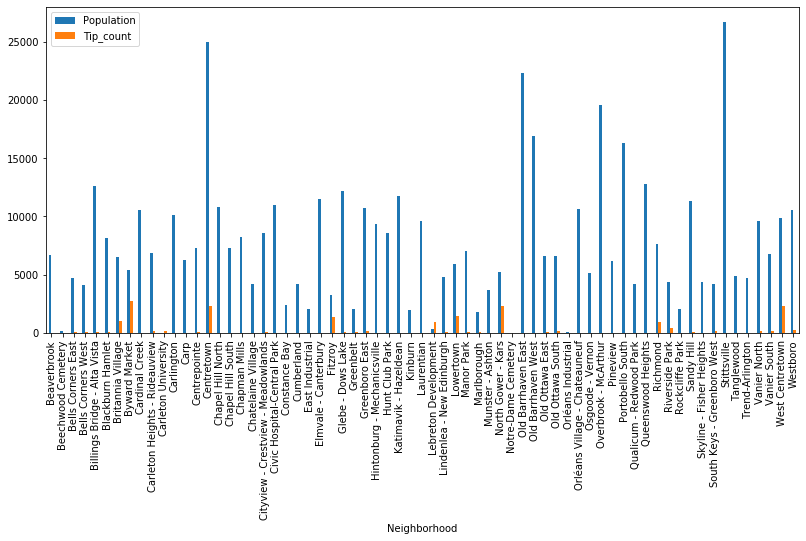

In [740]:
df_Neighborhoodsummarize.set_index(['Neighborhood'],drop=True,inplace=True)
ax = df_Neighborhoodsummarize.plot(kind='bar', figsize = (13.5,6))


In [746]:
df_summarize['Percentage']=df_summarize['Tip_count']/df_summarize['Population']

In [747]:
df_summarize.head()

,Neighborhood,Venue Category,Population,Tip_count,Percentage
0,Beaverbrook,Athletics & Sports,6715,0,0.000000
1,Beaverbrook,Rental Car Location,6715,0,0.000000
2,Beechwood Cemetery,Clothing Store,139,1,0.007194
3,Beechwood Cemetery,Dog Run,139,1,0.007194
4,Beechwood Cemetery,History Museum,139,0,0.000000


In [750]:
df_Neighborhoodsummarize['Percentage']=df_Neighborhoodsummarize['Tip_count']/df_Neighborhoodsummarize['Population']

In [758]:
df_Neighborhoodsummarize.sort_values(by='Percentage',ascending=False,inplace=True)
df_Neighborhoodsummarize.head()

,Population,Tip_count,Percentage
Neighborhood,,,
Carleton University,19,153,8.052632
Lebreton Development,369,912,2.471545
Byward Market,5382,2717,0.504831
North Gower - Kars,5213,2279,0.437176
Fitzroy,3299,1391,0.421643


In [775]:
df_summarizevcat=df_final.groupby(['Venue Category']).agg({'Population':'sum','Tip count':'sum'})

In [777]:
df_summarizevcat['Percentage']=df_summarizevcat['Tip count']/df_summarizevcat['Population']

,Population,Tip count,Percentage
Venue Category,,,
Adult Boutique,140876,96,0.000681
African Restaurant,3299,8,0.002425
American Restaurant,252925,363,0.001435
Antique Shop,6635,1,0.000151
Arcade,6635,13,0.001959


In [778]:
df_summarizevcat.sort_values(by='Percentage',ascending=False,inplace=True)
df_summarizevcat.head()

,Population,Tip count,Percentage
Venue Category,,,
Caribbean Restaurant,369,12,0.032520
Salad Place,738,20,0.027100
Optical Shop,74,2,0.027027
Men's Store,369,7,0.018970
Theme Park,369,5,0.013550


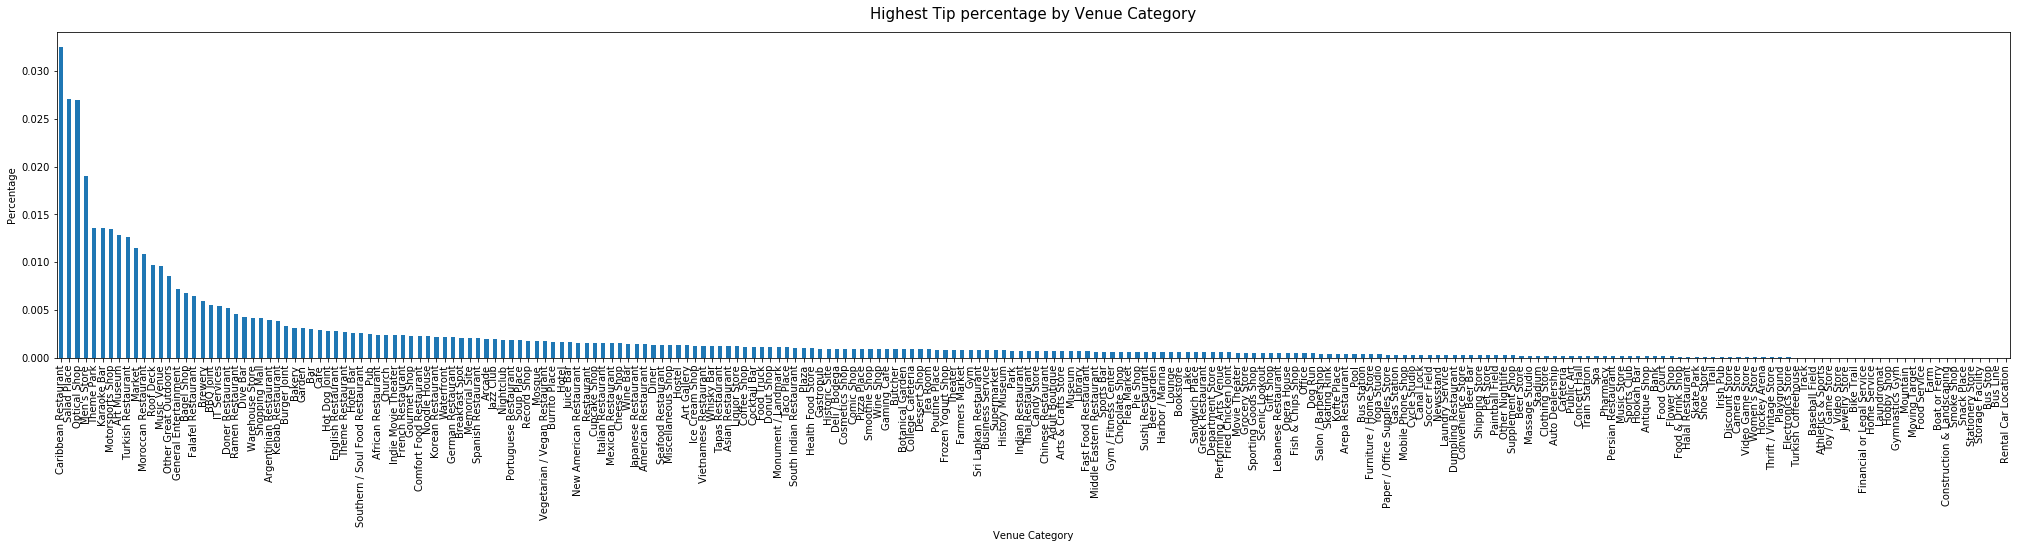

In [793]:
ax = df_summarizevcat['Percentage'].plot(kind='bar', figsize = (35,6))
plt.xlabel("Venue Category")
plt.ylabel("Percentage")
plt.title("Highest Tip percentage by Venue Category", y=1.02, fontsize=15)
plt.show()

In [877]:
kclusters = 7


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_Neighborhoodsummarize)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 4, 4, 4, 3, 0, 2, 0, 0])

In [878]:
df_merge=df_Neighborhoodsummarize
df_merge['Cluster Labels'] = kmeans.labels_


df_merge =  pd.merge(df_merge,
                 df_final[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']],
                 on='Neighborhood')

df_merge

,Neighborhood,Population,Tip_count,Percentage,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude
0,Carleton University,19,153,8.052632,3,45.385858,-75.695004
1,Carleton University,19,153,8.052632,3,45.385858,-75.695004
2,Carleton University,19,153,8.052632,3,45.385858,-75.695004
3,Carleton University,19,153,8.052632,3,45.385858,-75.695004
4,Carleton University,19,153,8.052632,3,45.385858,-75.695004
5,Carleton University,19,153,8.052632,3,45.385858,-75.695004
6,Carleton University,19,153,8.052632,3,45.385858,-75.695004
7,Carleton University,19,153,8.052632,3,45.385858,-75.695004
8,Carleton University,19,153,8.052632,3,45.385858,-75.695004
9,Carleton University,19,153,8.052632,3,45.385858,-75.695004


In [880]:
df_merge=df_merge.drop_duplicates()

In [881]:
df_merge=df_merge.reset_index()
df_merge.drop(columns=['index'],inplace=True)

In [882]:
df_merge.head()

,Neighborhood,Population,Tip_count,Percentage,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude
0,Carleton University,19,153,8.052632,3,45.385858,-75.695004
1,Lebreton Development,369,912,2.471545,3,45.420550,-75.701829
2,Byward Market,5382,2717,0.504831,4,45.427917,-75.692601
3,North Gower - Kars,5213,2279,0.437176,4,40.607675,43.094850
4,Fitzroy,3299,1391,0.421643,4,-37.801038,144.979261


In [899]:
map_clusters = folium.Map(location = [ottawa_latitude, ottawa_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merge['Neighborhood Latitude'], df_merge['Neighborhood Longitude'], df_merge['Neighborhood'], df_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### Examine each of the five clusters

In [922]:
df_merge.loc[df_merge['Cluster Labels'] == 0, df_merge.columns[[1] + list(range(2, df_merge.shape[1]))]]

,Population,Tip_count,Percentage,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude
6,5917,1465,0.247592,0,45.432490,-75.689376
8,6543,1019,0.155739,0,51.460913,-0.305055
9,7669,981,0.127918,0,37.538509,-77.434280
18,6852,153,0.022329,0,45.385594,-75.695921
19,6759,146,0.021601,0,45.436407,-75.661915
21,6635,141,0.021251,0,45.393809,-75.684493
24,7016,108,0.015393,0,51.426949,-0.135507
27,8545,107,0.012522,0,45.351154,-75.734441
28,7270,84,0.011554,0,45.685719,-122.601374
30,6645,47,0.007073,0,45.408514,-75.676733


In [921]:
df_merge.loc[df_merge['Cluster Labels'] == 1, df_merge.columns[[1] + list(range(2, df_merge.shape[1]))]]

,Population,Tip_count,Percentage,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude
38,19599,32,0.001633,1,45.431966,-75.651293
51,22286,7,0.000314,1,45.279020,-75.763036


In [920]:
df_merge.loc[df_merge['Cluster Labels'] == 2, df_merge.columns[[1] + list(range(2, df_merge.shape[1]))]]

,Population,Tip_count,Percentage,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude
7,9856,2339,0.237317,2,45.416340,-75.694286
16,10558,273,0.025857,2,45.391962,-75.754290
23,10722,177,0.016508,2,45.359732,-75.659222
25,9634,146,0.015155,2,45.436407,-75.661915
29,11365,81,0.007127,2,45.426347,-75.677767
31,12653,75,0.005927,2,45.387521,-75.675305
33,12193,44,0.003609,2,45.394615,-75.701608
35,9368,20,0.002135,2,45.407046,-75.732522
36,11800,25,0.002119,2,45.302074,-75.877992
37,10535,22,0.002088,2,40.203422,-85.403535


In [919]:
df_merge.loc[df_merge['Cluster Labels'] == 3, df_merge.columns[[1] + list(range(2, df_merge.shape[1]))]]

,Population,Tip_count,Percentage,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude
0,19,153,8.052632,3,45.385858,-75.695004
1,369,912,2.471545,3,45.420550,-75.701829
5,74,19,0.256757,3,45.465153,-75.546838
12,17,1,0.058824,3,45.442220,-75.651987
13,1812,91,0.050221,3,42.345927,-71.552287
14,2073,92,0.044380,3,39.004607,-76.875684
20,139,3,0.021583,3,45.447060,-75.660031
39,2062,2,0.000970,3,45.450965,-75.678953
62,2371,0,0.000000,3,45.486229,-76.073567
63,2084,0,0.000000,3,37.387827,-97.274468


In [914]:
df_merge.loc[df_merge['Cluster Labels'] == 4, df_merge.columns[[1] + list(range(2, df_merge.shape[1]))]]

,Population,Tip_count,Percentage,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude
2,5382,2717,0.504831,4,45.427917,-75.692601
3,5213,2279,0.437176,4,40.607675,43.094850
4,3299,1391,0.421643,4,-37.801038,144.979261
11,4371,380,0.086937,4,39.270363,-76.607917
15,4221,177,0.041933,4,45.359732,-75.659222
17,4779,107,0.022390,4,45.439003,-75.678663
22,4158,69,0.016595,4,45.318996,-75.829691
26,4729,69,0.014591,4,45.318996,-75.829691
42,3705,3,0.000810,4,51.893391,-8.451950
45,4172,2,0.000479,4,39.274430,-88.242379


In [915]:
df_merge.loc[df_merge['Cluster Labels'] == 5, df_merge.columns[[1] + list(range(2, df_merge.shape[1]))]]

,Population,Tip_count,Percentage,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude
46,16313,7,0.000429,5,-34.845191,138.494682
47,16880,7,0.000415,5,45.279020,-75.763036


In [916]:
df_merge.loc[df_merge['Cluster Labels'] == 6, df_merge.columns[[1] + list(range(2, df_merge.shape[1]))]]

,Population,Tip_count,Percentage,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude
10,24994,2339,0.093582,6,45.416340,-75.694286
56,26674,0,0.000000,6,45.269066,-75.914523
